In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import re
from wordcloud import WordCloud
import nltk

In [8]:
data = pd.read_csv('Sentiment Analysis.csv')

In [7]:
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [8]:
data.tail()

,id,label,tweet
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,31962,0,thank you @user for you follow


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21602 entries, 0 to 21601
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      21602 non-null  int64 
 1   label   21602 non-null  int64 
 2   tweet   21602 non-null  object
dtypes: int64(2), object(1)
memory usage: 506.4+ KB


In [10]:
data.shape

(21602, 3)

In [11]:
data.describe()

,id,label
count,21602.000000,21602.000000
mean,10801.500000,0.069114
std,6236.104593,0.253654
min,1.000000,0.000000
25%,5401.250000,0.000000
50%,10801.500000,0.000000
75%,16201.750000,0.000000
max,21602.000000,1.000000


In [20]:
def pattern_remove(in_text, in_pattern):
  a =  re.findall(in_pattern, in_text)
  for characters in a:
    in_text = re.sub(characters, "", in_text)
  return in_text

In [21]:
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [22]:
data.tail()

,id,label,tweet
21597,21598,0,i'm so today my small #cousin got his first ...
21598,21599,0,"for #rohingya, fear and forced marriages #traf..."
21599,21600,0,birds &amp; bad #piggies #finger family \ #n...
21600,21601,0,"now that #bfestbuzz is winding down, get for..."
21601,21602,0,no history of an incid


In [23]:
data['new_tweet'] = np.vectorize(pattern_remove)(data['tweet'], "@[\w]*")

In [24]:
data.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [25]:
data['new_tweet'] = data['new_tweet'].str.replace("[^a-zA-Z#]", " ")

In [26]:
data.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [27]:
data['new_tweet'] = data['new_tweet'].apply(lambda b : " ".join([c for c in b.split() if len(c)>3]))


In [28]:
data.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't cause they don't off...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0,factsguide: society now #motivation,factsguide: society #motivation


In [29]:
used_words = data['new_tweet'].apply(lambda b : b.split())
used_words.head()

,new_tweet
0,"[when, father, dysfunctional, selfish, drags, ..."
1,"[thanks, #lyft, credit, can't, cause, they, do..."
2,"[bihday, your, majesty]"
3,"[#model, love, take, with, time, urð±!!!, ð..."
4,"[factsguide:, society, #motivation]"


In [31]:
for i in range(len(used_words)):
  used_words[i] = " ".join(used_words[i])
data['new_tweet'] = used_words

In [32]:
data.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't cause they don't off...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0,factsguide: society now #motivation,factsguide: society #motivation


In [33]:
freq_words = " ".join([words for words in data['new_tweet']])

<function matplotlib.pyplot.show(close=None, block=None)>

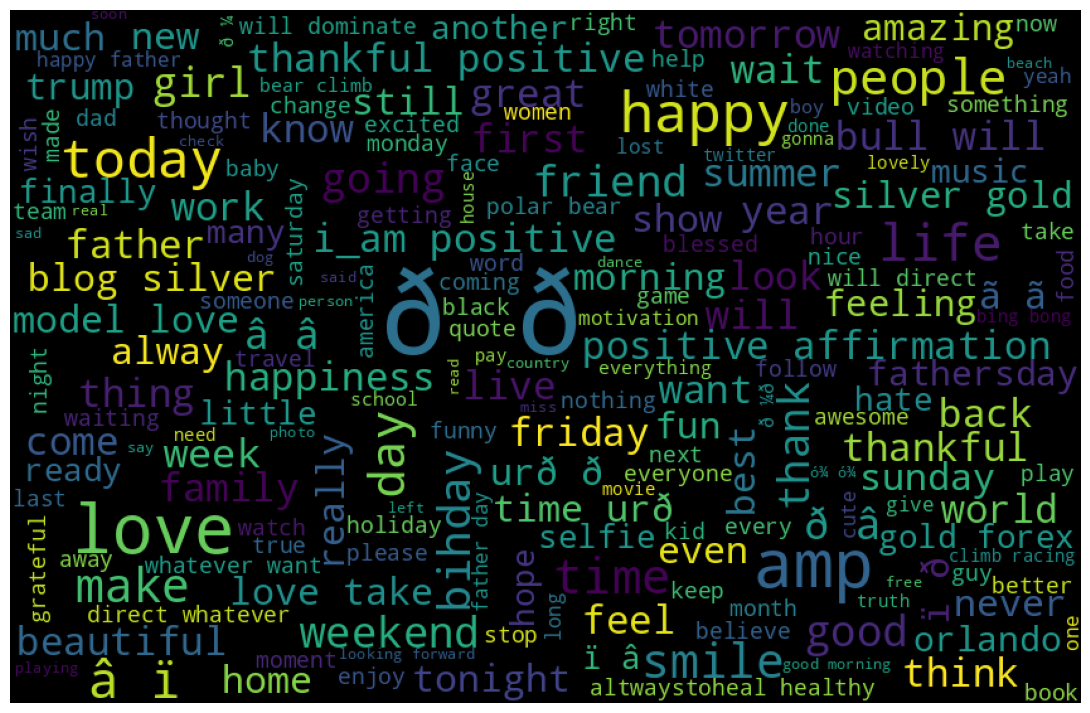

In [35]:
cloud_word = WordCloud(width = 850, height = 550, random_state = 50, max_font_size = 90).generate(freq_words)
plt.figure(figsize=(16,9))
plt.imshow(cloud_word)
plt.axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

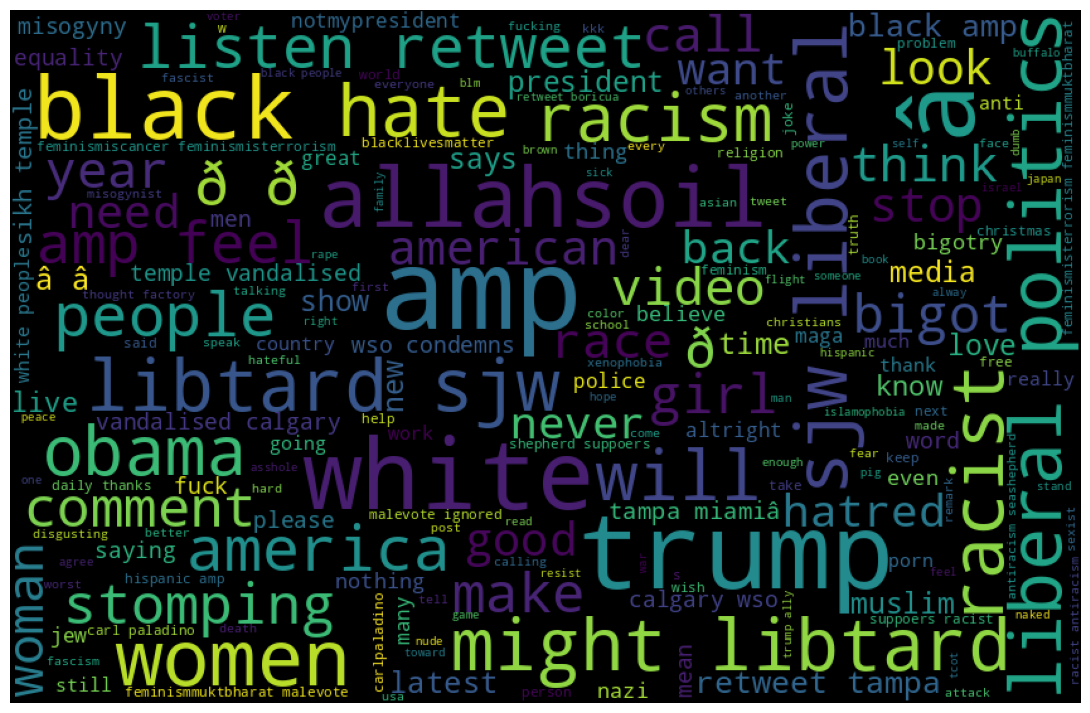

In [37]:
freq_words = " ".join([words for words in data['new_tweet'][data['label']==1]])

cloud_word = WordCloud(width = 850, height = 550, random_state = 50, max_font_size = 90).generate(freq_words)
plt.figure(figsize=(16,9))
plt.imshow(cloud_word)
plt.axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

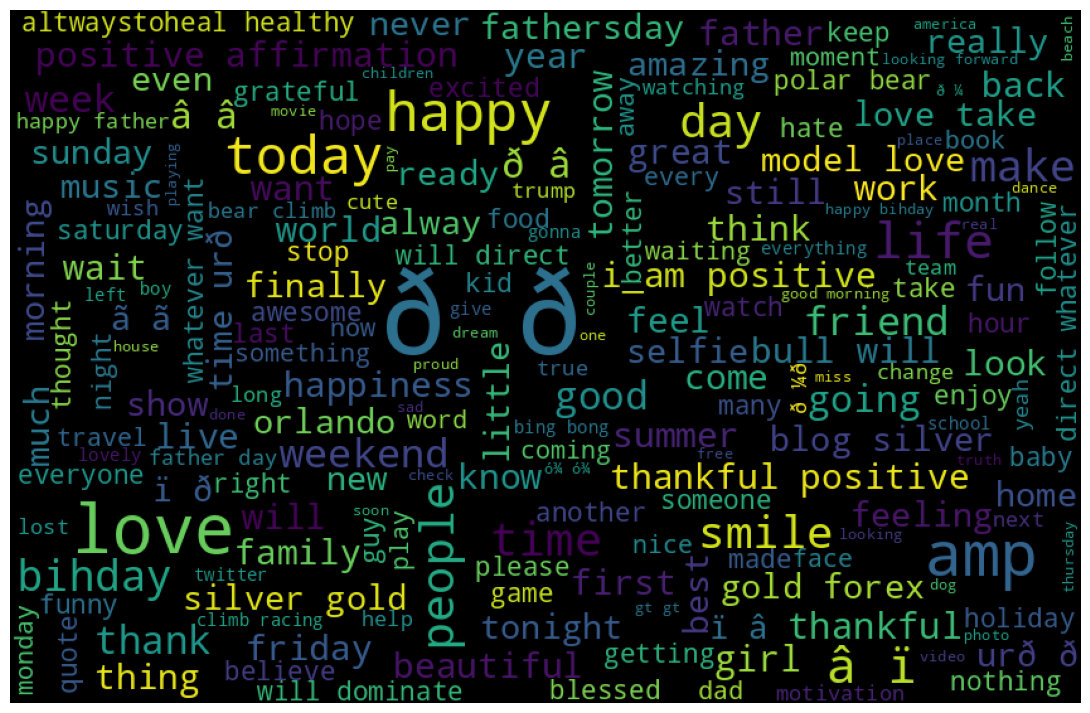

In [38]:
freq_words = " ".join([words for words in data['new_tweet'][data['label']==0]])

cloud_word = WordCloud(width = 850, height = 550, random_state = 50, max_font_size = 90).generate(freq_words)
plt.figure(figsize=(16,9))
plt.imshow(cloud_word)
plt.axis('off')
plt.show

In [39]:
def get_hashtag(tweets):
  hash_tag = []
  for tweet in tweets:
    d = re.findall(r"#(\w+)", tweet)
    hash_tag.append(d)
  return hash_tag


In [41]:
hashtag_negative = get_hashtag(data['new_tweet'][data['label']==1])

hashtag_positive = get_hashtag(data['new_tweet'][data['label']==0])

In [43]:
hashtag_negative[:5]

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphins',
  'thecove',
  'helpcovedolphins'],
 [],
 [],
 ['neverump', 'xenophobia']]

In [44]:
hashtag_positive[:5]

[['run'], ['lyft', 'disapointed', 'getthanked'], [], ['model'], ['motivation']]

In [45]:
hashtag_positive = sum(hashtag_positive, [])

hashtag_negative = sum(hashtag_negative, [])


In [46]:
hashtag_positive[:5]

['run', 'lyft', 'disapointed', 'getthanked', 'model']

In [52]:
tweet_count = nltk.FreqDist(hashtag_positive)
e = pd.DataFrame({'name_hashtag':list(tweet_count.keys()),
                    'total_count': list(tweet_count.values())})


In [53]:
e.head()

,name_hashtag,total_count
0,run,21
1,lyft,1
2,disapointed,1
3,getthanked,2
4,model,247


In [54]:
e = e.nlargest(columns='total_count', n=5)
fig = px.bar(e,x="name_hashtag", y="total_count", color="name_hashtag", )
fig.show()

In [59]:
hashtag_negative[:15]

['cnn',
 'michigan',
 'tcot',
 'australia',
 'opkillingbay',
 'seashepherd',
 'helpcovedolphins',
 'thecove',
 'helpcovedolphins',
 'neverump',
 'xenophobia',
 'love',
 'peace',
 'race',
 'identity']

In [60]:
tweet_count = nltk.FreqDist(hashtag_negative)
e = pd.DataFrame({'name_hashtag':list(tweet_count.keys()),
                    'total_count': list(tweet_count.values())})

In [61]:
e.head()

,name_hashtag,total_count
0,cnn,7
1,michigan,2
2,tcot,8
3,australia,4
4,opkillingbay,1


In [62]:
e = e.nlargest(columns='total_count', n=5)
fig = px.bar(e,x="name_hashtag", y="total_count", color="name_hashtag", )
fig.show()